## Details:
* Date - The date of the observation.
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('avocado.csv')
df.drop('Unnamed: 0',axis = 1 , inplace = True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Univariate Analysis

#### Q1: check distribution of average price during Jan 2018


In [ ]:
df['Month']  = df['Date'].apply(lambda r : r[5:7])

In [19]:
a = df[(df['Month'] == '01') & (df['year'] == 2018)]


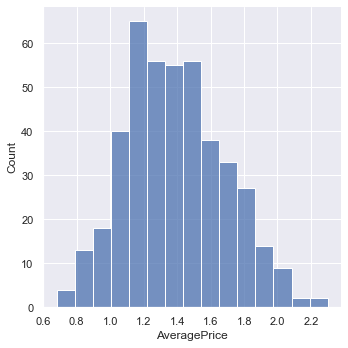

In [22]:
sns.displot(data = a , x= 'AveragePrice' )

#### Q2: using diffrent chart than you used in the previous one, plot the distribution for Jan 2018 Average price


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

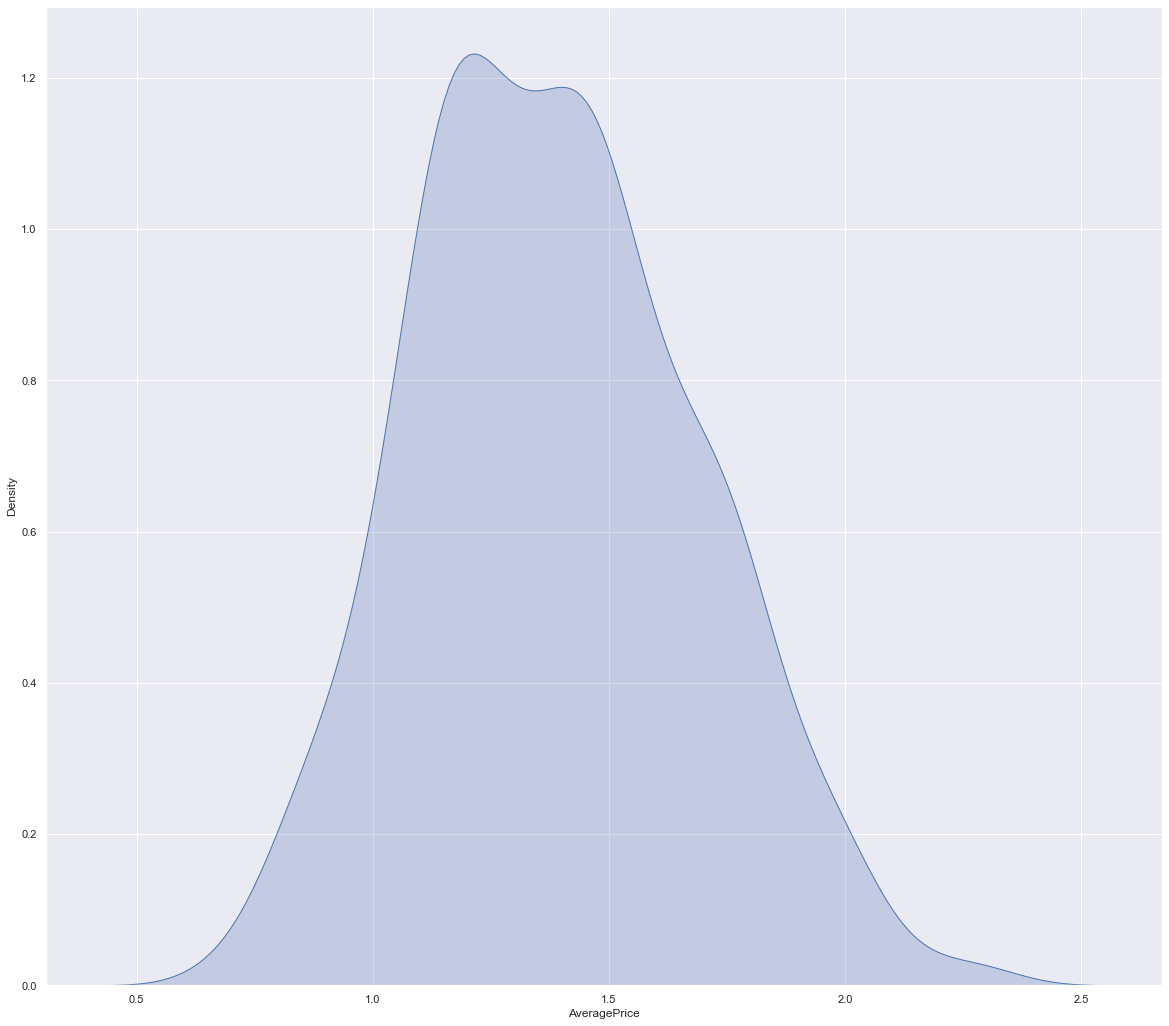

In [23]:
sns.kdeplot(data = a  , x = 'AveragePrice' , shade = True)

#### Q3: Create box-plot for the Average price, but this time for all the dataset, and comment your conclusion


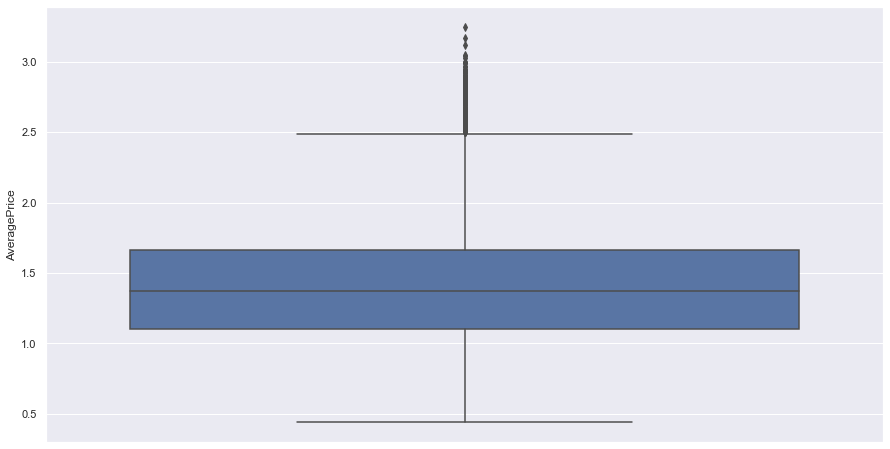

In [26]:
sns.boxplot(data = df, y = 'AveragePrice');

# Bi/Multivariate

#### Q4: Create a tracing boxplots (multiple box-plots in one figure) that shows the average price for each month and colored by year to distnguish between them

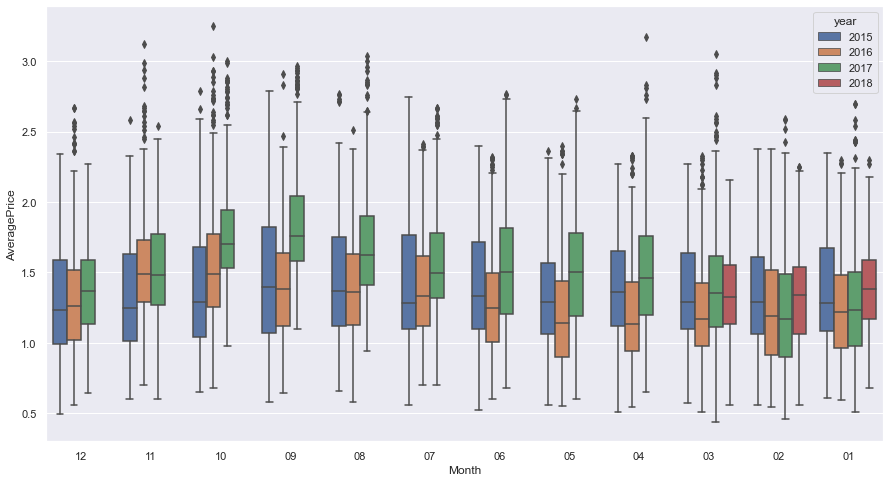

In [28]:

sns.boxplot(data = df, x = 'Month', y = 'AveragePrice', hue = 'year');    


#### Q5: compare between average prcies of diffrent types of producs


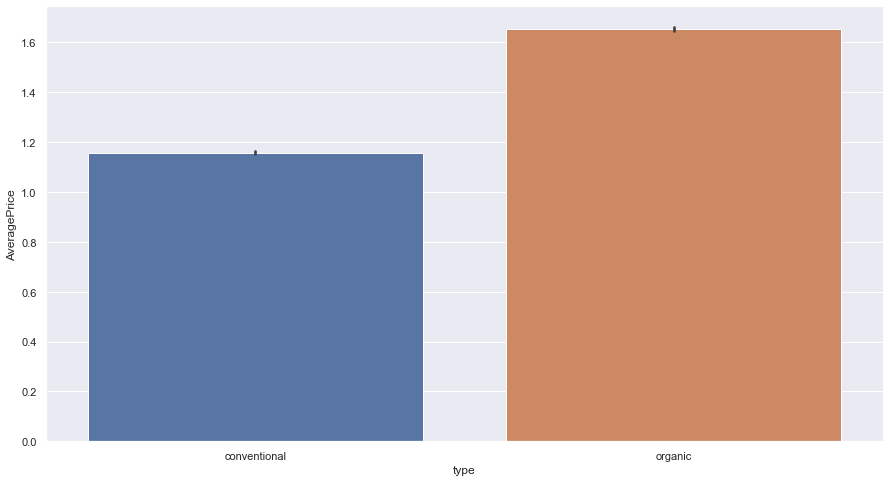

In [29]:
sns.barplot(x="type", y = "AveragePrice", data=df);



#### Q6:what are the top 10 best selling region with pandas and with a chart?

In [34]:
df.groupby('region').sum()['Total Bags'].sort_values(ascending = False).head(10)

region
TotalUS         1.638601e+09
West            3.670736e+08
California      2.466822e+08
SouthCentral    2.333924e+08
Northeast       1.969884e+08
Southeast       1.815276e+08
GreatLakes      1.785756e+08
LosAngeles      1.682645e+08
Midsouth        1.565136e+08
Plains          7.784720e+07
Name: Total Bags, dtype: float64

In [35]:
top_10_selling_region_index = df.groupby('region').sum()['Total Bags'].sort_values(ascending = False).head(10).index

top_10_selling_region_data = df[df['region'].isin(top_10_selling_region_index)]



<AxesSubplot:xlabel='region', ylabel='Total Bags'>

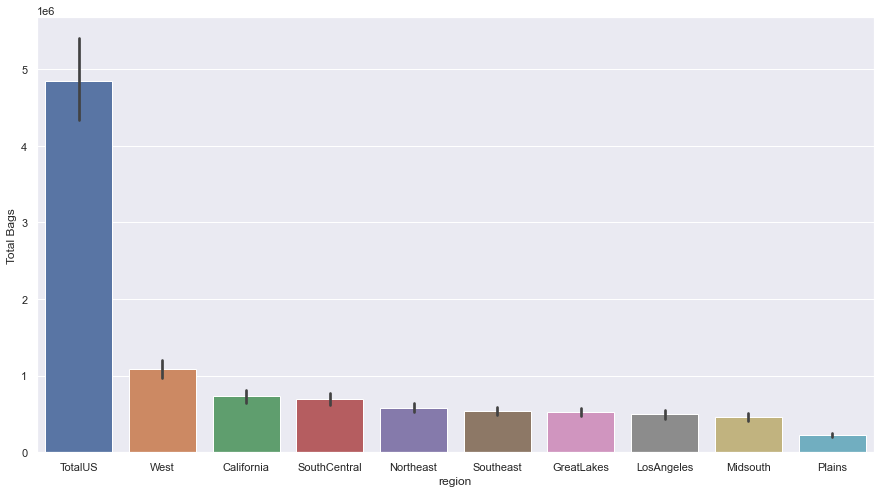

In [37]:
sns.barplot(data = top_10_selling_region_data , x = 'region' , y = 'Total Bags' , order=top_10_selling_region_index) 

#### Q7 : Create multiple a heat map to compare between Average Price for each month for each year.


In [41]:
pd.pivot_table(data = df , index = 'year' , columns = 'Month' , values ='Total Bags'  )


Month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2015,117337.264028,126555.650949,127622.400111,134856.551806,146426.591278,163805.646528,150467.386250,129333.573963,130045.139699,128733.408218,136888.279889,160714.450325
2016,240471.469093,271750.362384,256027.159398,269479.695046,295044.604741,276875.973125,282310.006981,270808.901921,268582.287616,230595.747204,199136.829213,263753.326921
2017,316339.613870,341601.167130,283827.089838,321015.911296,350149.488310,343324.379465,290480.523056,253573.479028,206227.066991,215118.239241,256748.859653,278638.925426
2018,332771.772245,400877.131829,404165.789213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Month', ylabel='year'>

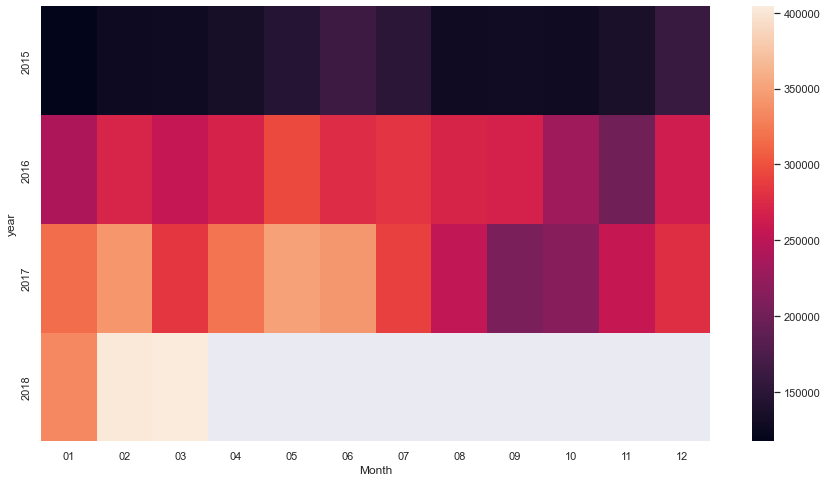

In [46]:
x  = pd.pivot_table(data = df , index = 'year' , columns = 'Month' , values ='Total Bags'  )
sns.heatmap(x)

#### Q9 : Create bar chart group for each year, reflects Average Price in each month 


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

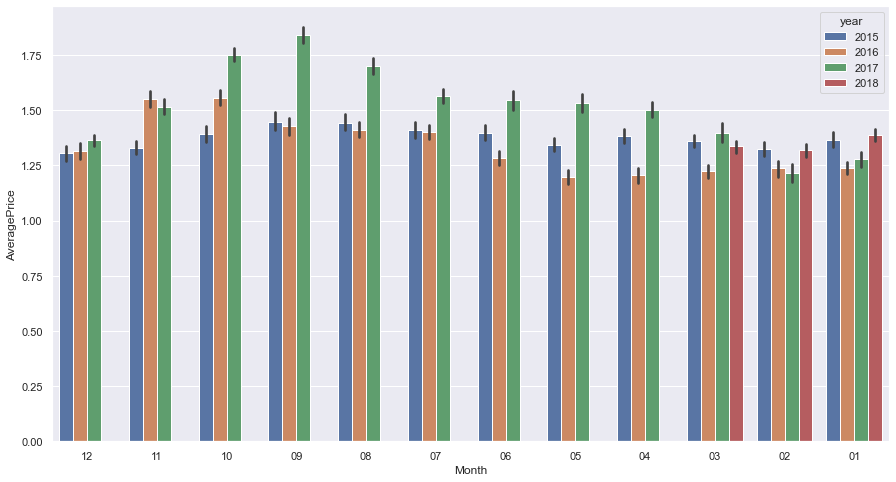

In [48]:
sns.barplot(data = df, x="Month", y="AveragePrice", hue = 'year')

#### Create a new column for profit  

In [50]:
df['Profit'] = df['AveragePrice'] * df['Total Volume']

#### what is the best selling Month

In [53]:
df.groupby('Month').sum()['Profit'].sort_valuess(ascending = False)

Month
01    1.771539e+09
03    1.730009e+09
02    1.648614e+09
07    1.529586e+09
05    1.515673e+09
08    1.343889e+09
10    1.342014e+09
04    1.327835e+09
06    1.312736e+09
09    1.207088e+09
12    1.107970e+09
11    1.097177e+09
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Profit'>

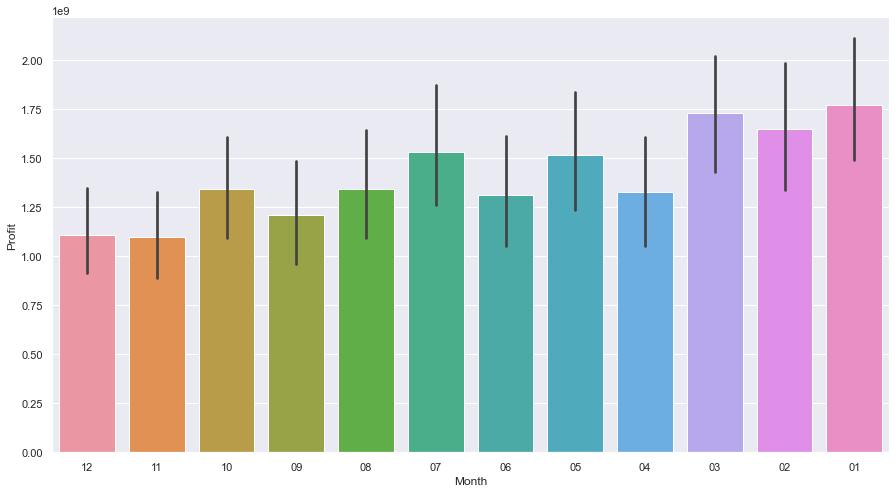

In [55]:
sns.barplot(data = df , x = 'Month' , y = 'Profit' , estimator=sum)

### For each month what is the most selling type

In [60]:
pd.pivot_table(data = df , index ='Month', columns ='type' , values = 'Profit' , aggfunc=sum)

type,conventional,organic
Month,,
01,1.705844e+09,6.569540e+07
02,1.582465e+09,6.614860e+07
03,1.654179e+09,7.583001e+07
04,1.271318e+09,5.651709e+07
05,1.456152e+09,5.952082e+07
06,1.262411e+09,5.032509e+07
07,1.472206e+09,5.738026e+07
08,1.292198e+09,5.169113e+07
09,1.157121e+09,4.996683e+07


<AxesSubplot:xlabel='type', ylabel='Month'>

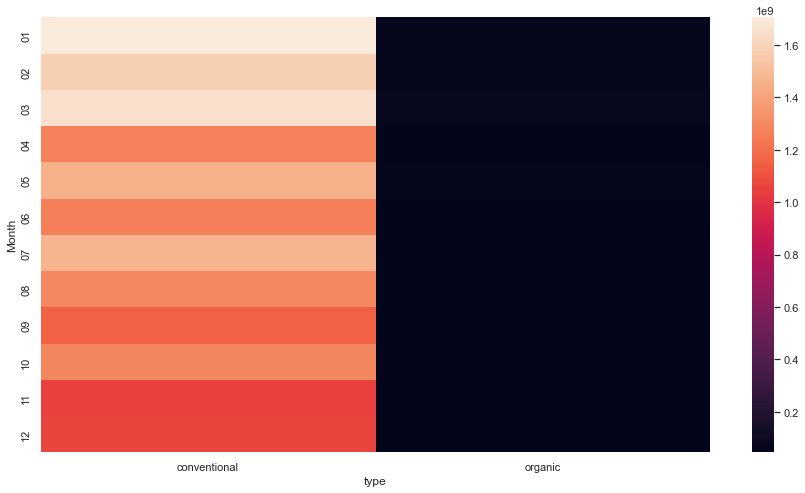

In [61]:
z = pd.pivot_table(data = df , index ='Month', columns ='type' , values = 'Profit' , aggfunc=sum)
sns.heatmap(z)